In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Trainability

## 1D, Constant Function

In [2]:
model_list1 = loader(data_path("sparse_regularisation_model"))
model_list2 = loader(data_path("sparse_standard_model"))

In [3]:
loss1 = np.array([model.loss for model in model_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([model.loss for model in model_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

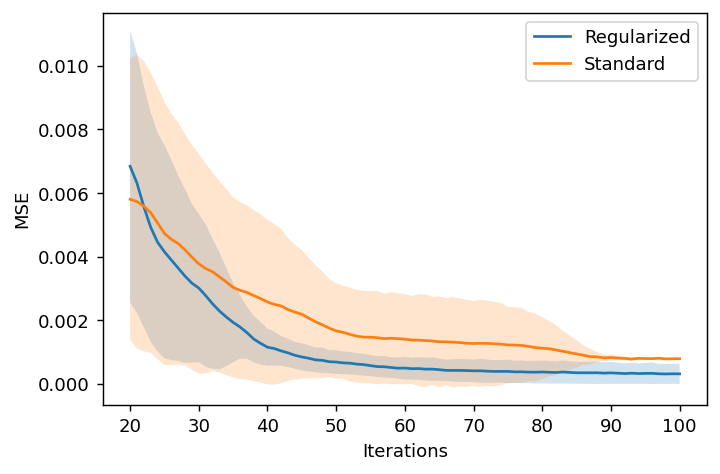

In [4]:
start = 20
stop = 101
alpha = 0.2
spacing1 = list(range(101))
spacing2 = list(range(stop))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(spacing1[start:], (avg1 - std1)[start:], (avg1 + std1)[start:], alpha=alpha)
plt.fill_between(spacing2[start:], (avg2 - std2)[start:stop], (avg2 + std2)[start:stop], alpha=alpha)
plt.plot(spacing1[start:], avg1[start:])
plt.plot(spacing2[start:], avg2[start:stop])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["Regularized", "Standard"])
plt.show()

In [17]:
print(avg2[-1])

0.0007895467479344792


In [5]:
map_params = np.array([model.map_params for model in model_list1])

In [6]:
map_params_avg = np.mean(map_params, axis=0)
map_params_std = np.std(map_params, axis=0)

(10, 101, 4)


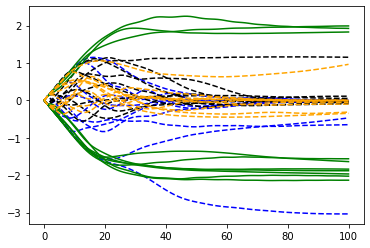

In [7]:
print(map_params.shape)
plt.plot(map_params[:,:,0].T, color="blue", linestyle="--")
plt.plot(map_params[:,:,1].T, color="black", linestyle="--")
plt.plot(map_params[:,:,2].T, color="green")
plt.plot(map_params[:,:,3].T, color="orange", linestyle="--")
#plt.plot(map_params[1])
#plt.fill_between(list(range(101)), map_params_avg[:,0] - map_params_std[:,0], map_params_avg[:,0] + map_params_std[:,0], alpha=alpha)
#plt.legend(["1", "2", "3", "4"])
plt.show()

### Test Data

In [18]:
np.random.seed(43)

n = 100
n_features = 4

x = np.random.uniform(0, np.pi, (n, n_features))
y = scaler(x[:,2], a=0.1, b=0.9).reshape(-1,1)

In [19]:
loss_list_reg = []
for model in model_list1:
    y_pred = model.predict(x)
    loss = np.mean((y_pred - y)**2)
    loss_list_reg.append(loss)

loss_reg = np.mean(loss_list_reg)
loss_reg_std = np.std(loss_list_reg)

In [20]:
loss_list_standard = []
for model in model_list2:
    y_pred = model.predict(x)
    loss = np.mean((y_pred - y)**2)
    loss_list_standard.append(loss)

loss_standard = np.mean(loss_list_standard)
loss_standard_std = np.std(loss_list_standard)

In [21]:
print(f"test loss regularzation: {loss_reg:.5f} +- {loss_reg_std:.5f}")
print(f"test loss standard:      {loss_standard:.5f} +- {loss_standard_std:.5f}")

test loss regularzation: 0.00039 +- 0.00035
test loss standard:      0.00101 +- 0.00007


In [ ]:
y_pred = model_list2[0].predict(x)

In [ ]:
print(y_pred.flatten())
print(y.flatten())